In [1]:
import IsoDAT2D as iso
import SimDAT2D as sim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
import masking
import cupy
import nimfa

In [2]:
#masking algoirthm to create masks for the data

def make_masks(array, slices, offset = 5, width=.5, gits = False):
    masks = []
    mask_2048 = np.zeros((2048, 2048), dtype=bool)
    mask_2048[1024:] = True
    for i in slices:
        masks.append(masking.generate_mask_slices(array, width, i, offset = offset))
        print('Mask with {} slices created'.format(i))
        if gits == True:
            gits_masks = []
            for i in range(len(masks)):
                masks_p = masks[i] + mask_2048
                gits_masks.append(masks_p)
                plt.imshow(masks_p)
    return gits_masks

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
Ni


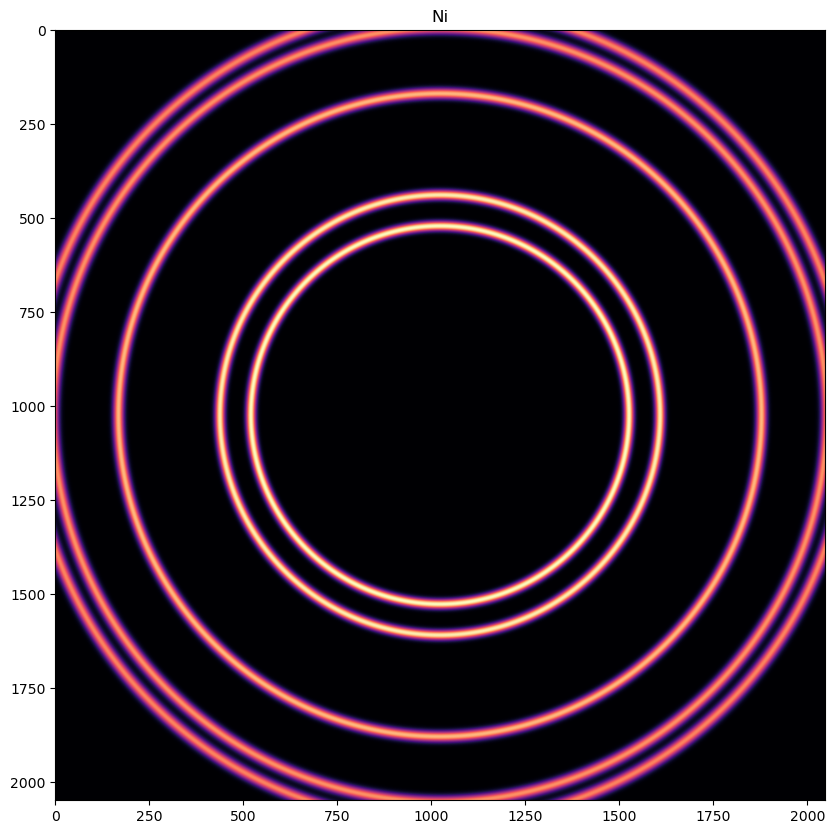

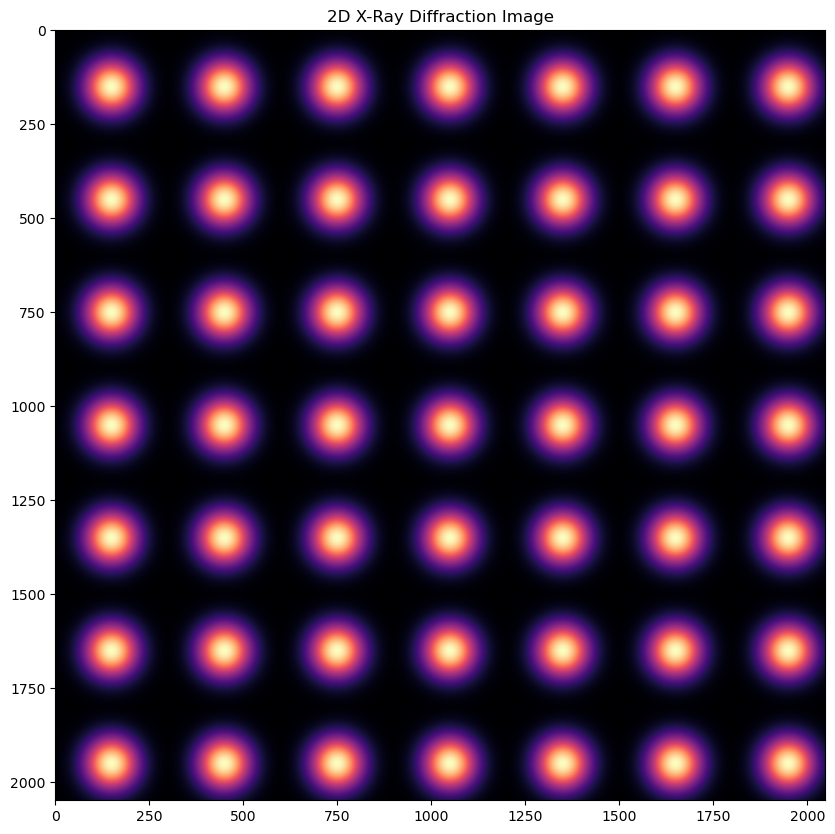

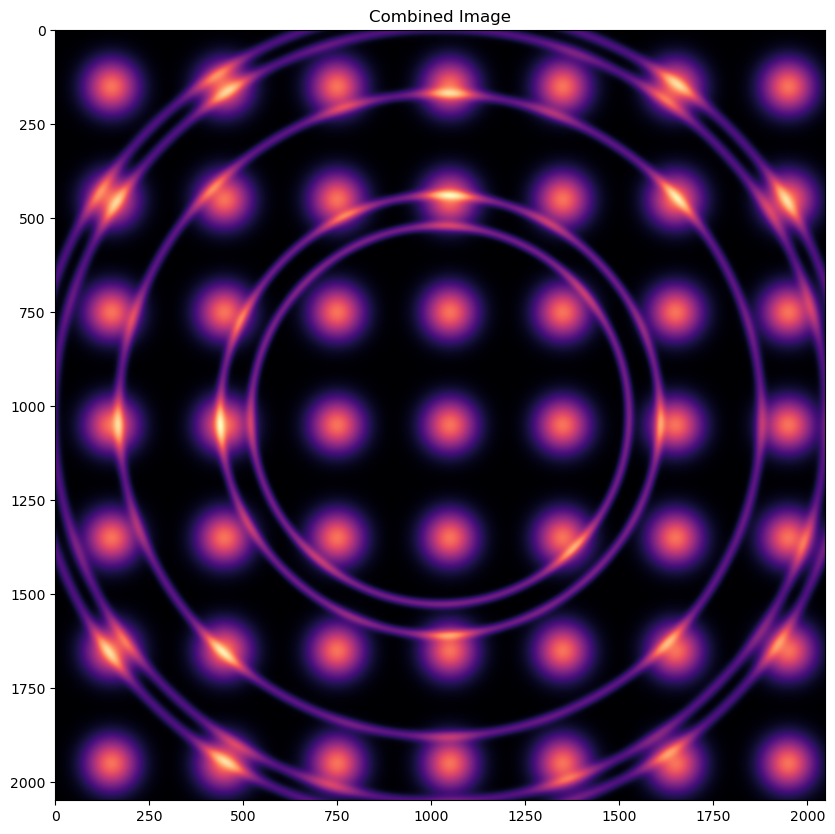

In [3]:
#creating synthetic data

#For ring creation
isotropic_signal = sim.create_isotropic(.4, .5e-10, cmap = 'magma')
#For spot creation
anisotropic_signal = sim.create_anisotropic(25, 50, 300, 300, cmap = 'magma')
#combining signals 
thin_film = sim.combine_image(isotropic_signal, anisotropic_signal*2, cmap= 'magma')

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

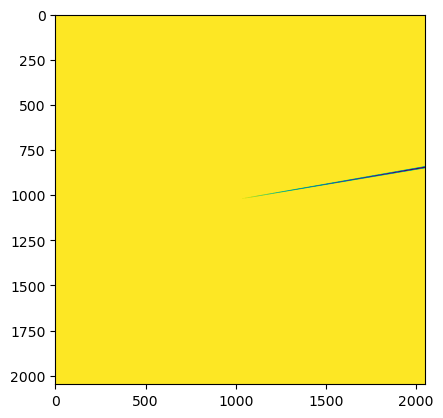

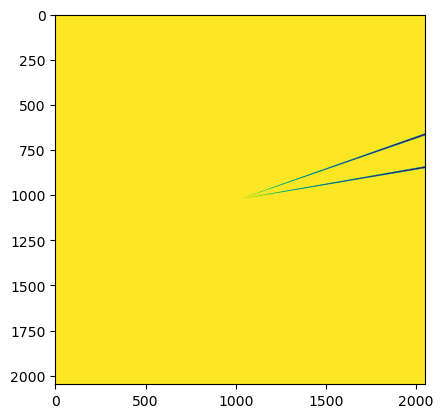

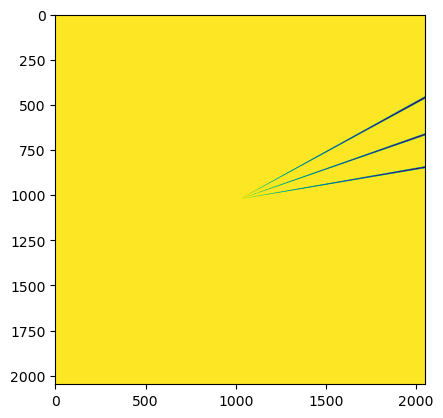

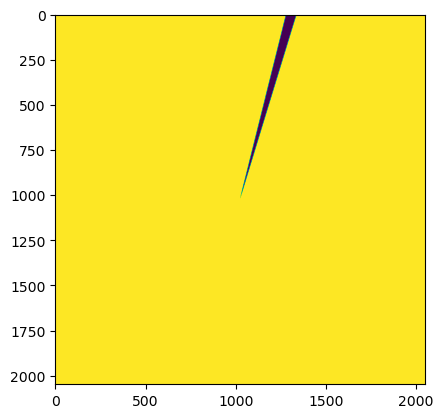

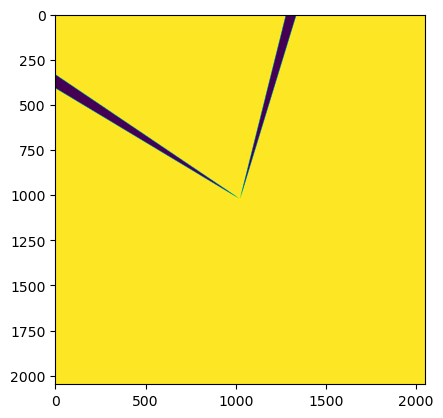

In [4]:
array, ai_pe = masking.make_chi_array(thin_film, .4, .5e-10)
masks = make_masks(array, [1,2,3], offset = 9, width = .5, gits = True)
masks_v2 = make_masks(array, [1,2], offset = 70, width = 3, gits = True)
mask_one = masks[0] 
mask_two = masks[1] 
mask_three = masks[2] 
mask_four = masks_v2[0] 
mask_five = masks_v2[1]

/home/dalverson/miniconda3/envs/venv/lib/python3.11/site-packages/pyopencl/cache.py:495: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  _create_built_program_from_source_cached(


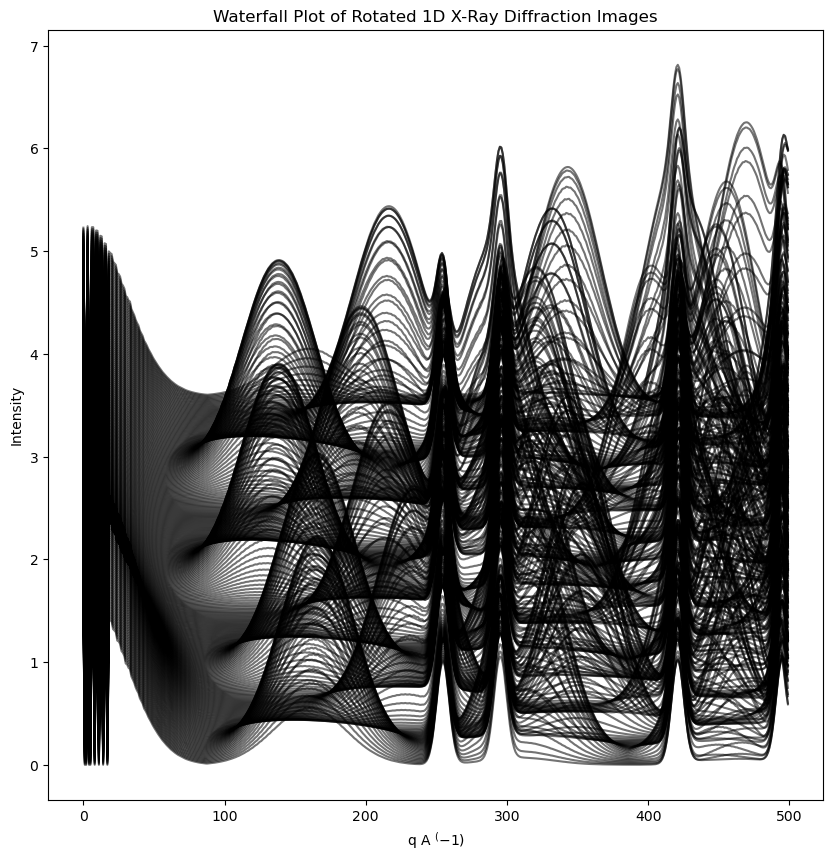

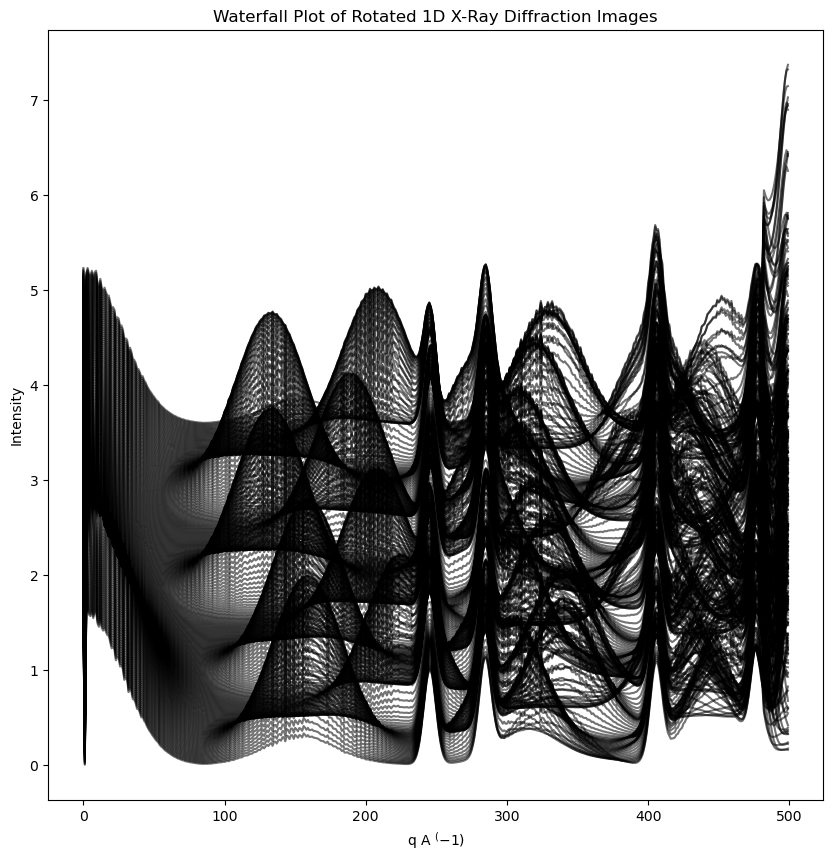

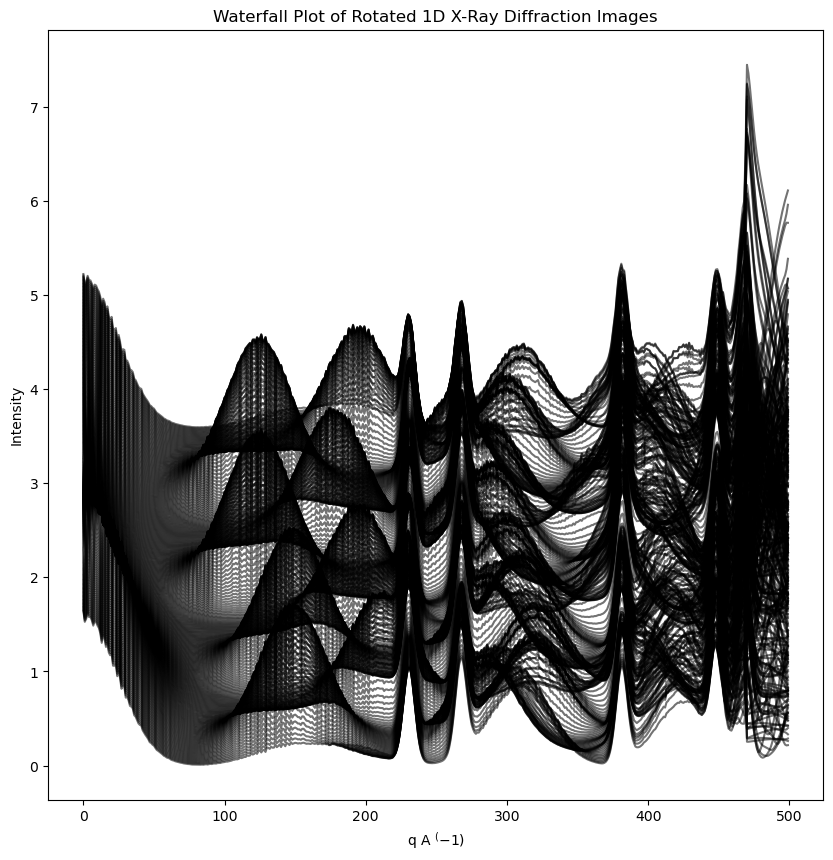

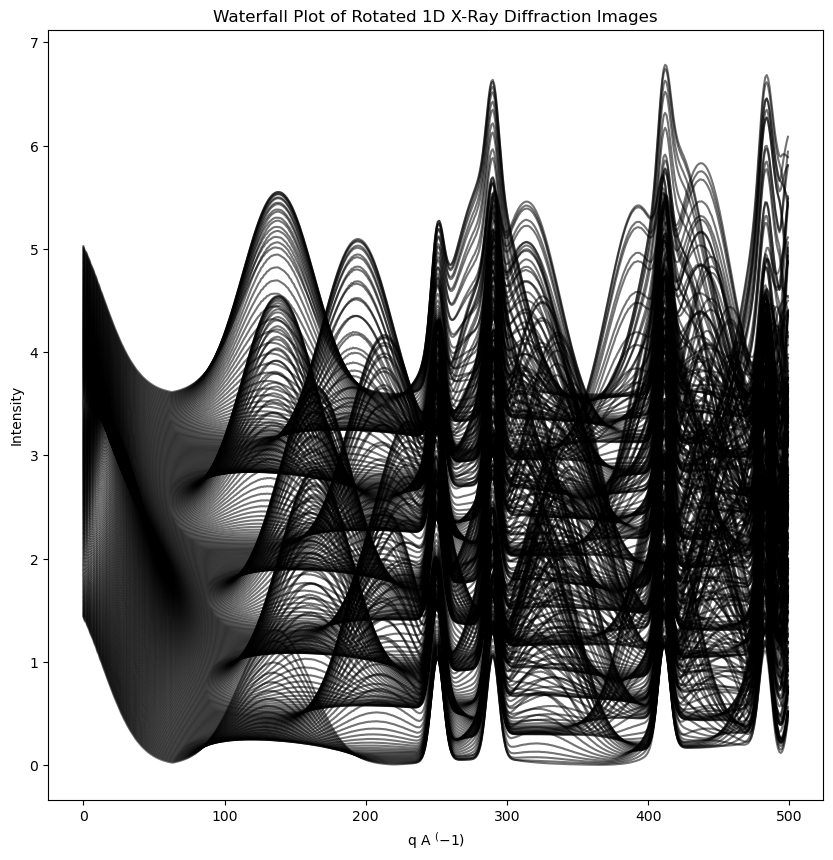

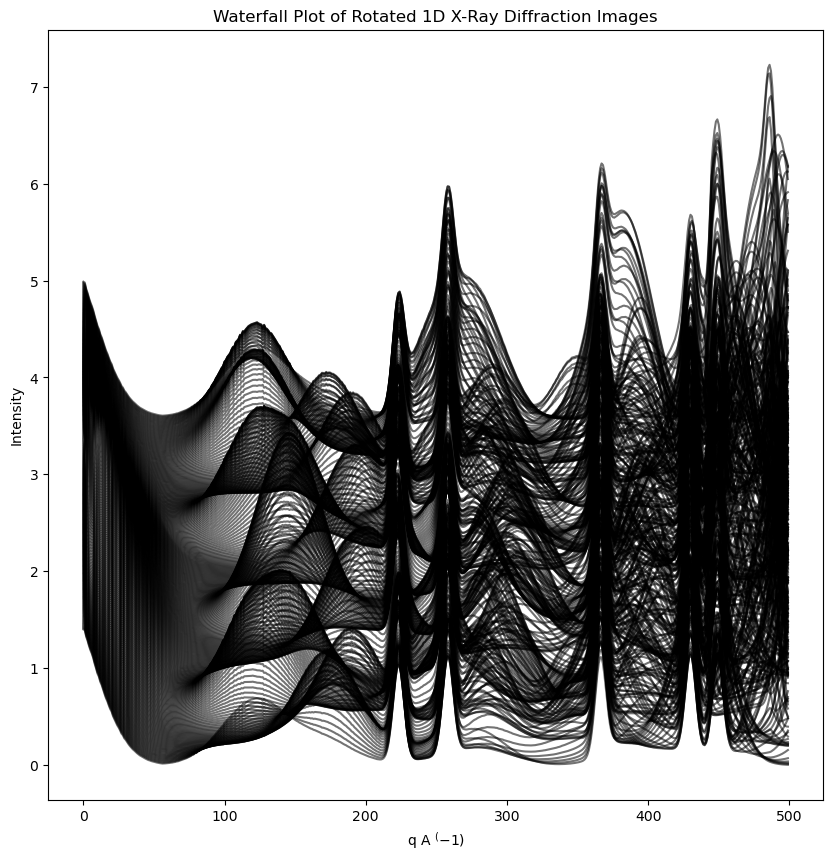

In [5]:
rotated_data = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_one)
rotated_data_v2 = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_two)
rotated_data_v3 = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_three)
rotated_data_v4 = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_four)
rotated_data_v5 = iso.rotate_integrate_image_gpu(thin_film, 1, .4, .5e-10, resolution = 500, mask = mask_five)

In [6]:
column_mapping = {}
for i in range(361, 721):
    column_mapping[(i - 361)] = (i)
rotated_data_v2.rename(columns=column_mapping, inplace=True) 
   
column_mapping = {}
for i in range(722, 1082):
    column_mapping[(i - 722)] = (i)
print(column_mapping)
rotated_data_v3.rename(columns=column_mapping, inplace=True) 

column_mapping = {}
for i in range(1083, 1443):
    column_mapping[(i - 1083)] = (i)
print(column_mapping)
rotated_data_v4.rename(columns=column_mapping, inplace=True)  
  
column_mapping = {}
for i in range(1444, 1804):
    column_mapping[(i - 1444)] = (i)
rotated_data_v5.rename(columns=column_mapping, inplace=True)

combining = pd.concat([rotated_data, rotated_data_v2, rotated_data_v3, rotated_data_v4, rotated_data_v5], axis = 1)
combined_rot_data = combining.clip(lower=0)
combined_rot_data = np.array(combined_rot_data) 

{0: 722, 1: 723, 2: 724, 3: 725, 4: 726, 5: 727, 6: 728, 7: 729, 8: 730, 9: 731, 10: 732, 11: 733, 12: 734, 13: 735, 14: 736, 15: 737, 16: 738, 17: 739, 18: 740, 19: 741, 20: 742, 21: 743, 22: 744, 23: 745, 24: 746, 25: 747, 26: 748, 27: 749, 28: 750, 29: 751, 30: 752, 31: 753, 32: 754, 33: 755, 34: 756, 35: 757, 36: 758, 37: 759, 38: 760, 39: 761, 40: 762, 41: 763, 42: 764, 43: 765, 44: 766, 45: 767, 46: 768, 47: 769, 48: 770, 49: 771, 50: 772, 51: 773, 52: 774, 53: 775, 54: 776, 55: 777, 56: 778, 57: 779, 58: 780, 59: 781, 60: 782, 61: 783, 62: 784, 63: 785, 64: 786, 65: 787, 66: 788, 67: 789, 68: 790, 69: 791, 70: 792, 71: 793, 72: 794, 73: 795, 74: 796, 75: 797, 76: 798, 77: 799, 78: 800, 79: 801, 80: 802, 81: 803, 82: 804, 83: 805, 84: 806, 85: 807, 86: 808, 87: 809, 88: 810, 89: 811, 90: 812, 91: 813, 92: 814, 93: 815, 94: 816, 95: 817, 96: 818, 97: 819, 98: 820, 99: 821, 100: 822, 101: 823, 102: 824, 103: 825, 104: 826, 105: 827, 106: 828, 107: 829, 108: 830, 109: 831, 110: 832,

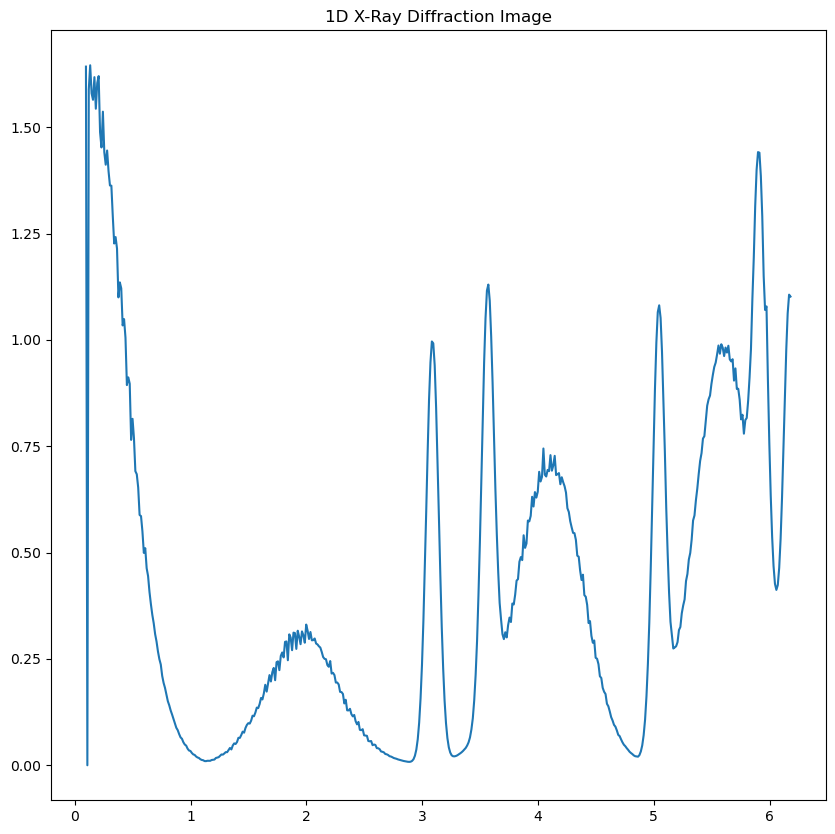

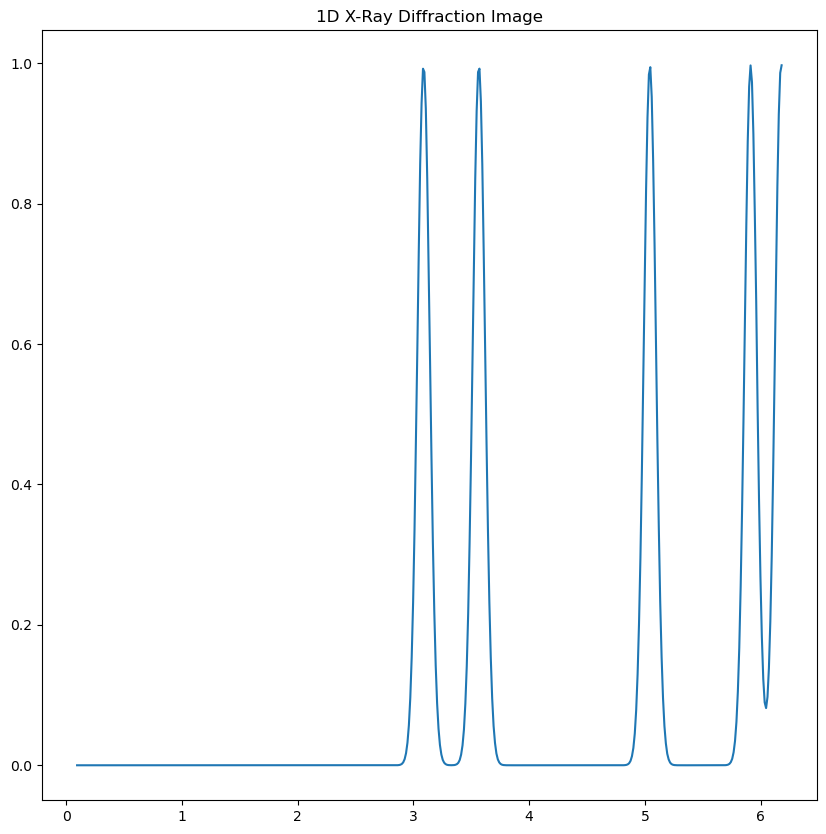

In [7]:
q, integrated_im = sim.integrate_image(thin_film, .4, .5e-10, resolution = 500, mask = mask_two, show = True)
q, integrated_im2 = sim.integrate_image(isotropic_signal, .4, .5e-10, resolution = 500, mask = mask_two, show = True)  

Starting NMF algorithm with the following parameters:

Max components: 30
Max iterations: 1000
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: random, solver: mu, tol: 1e-05
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has 

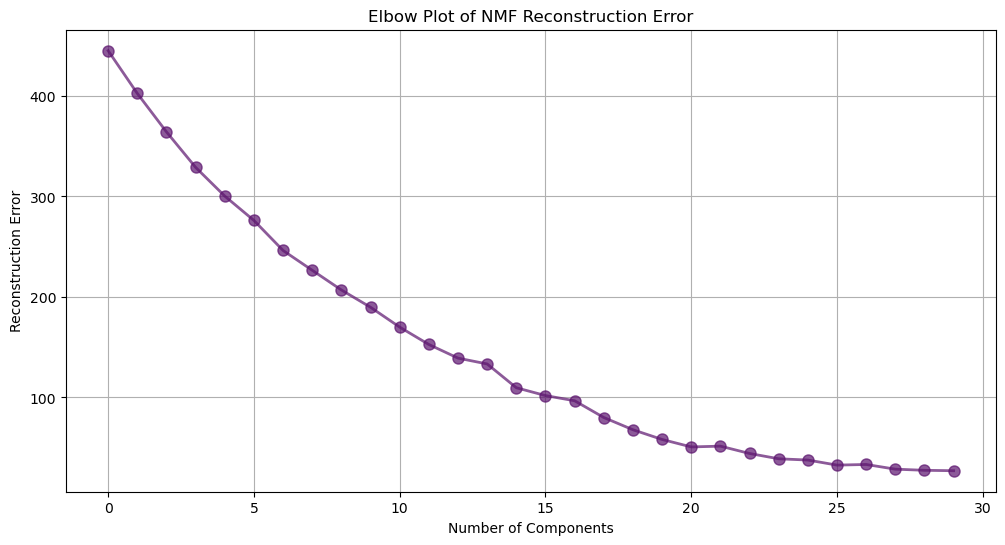

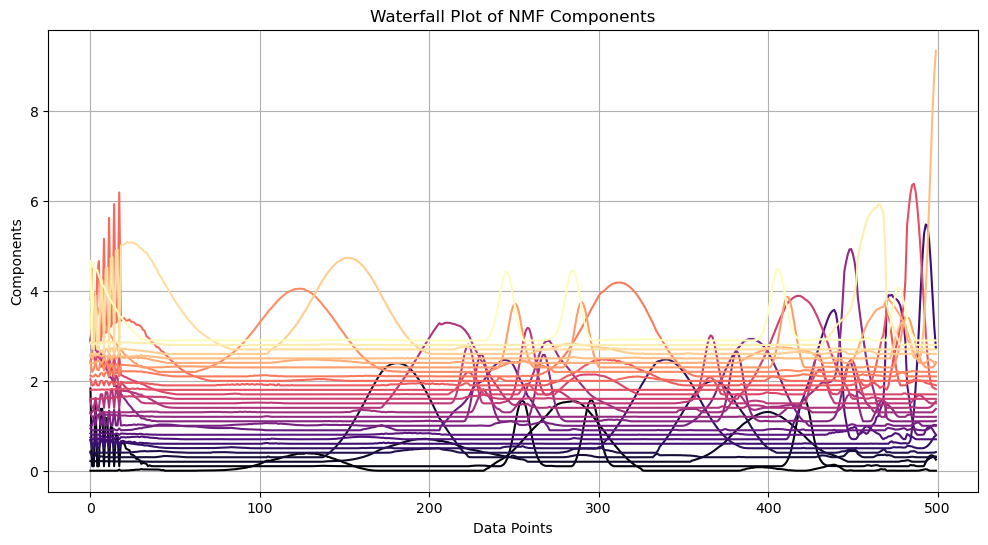

The best number of components is 30


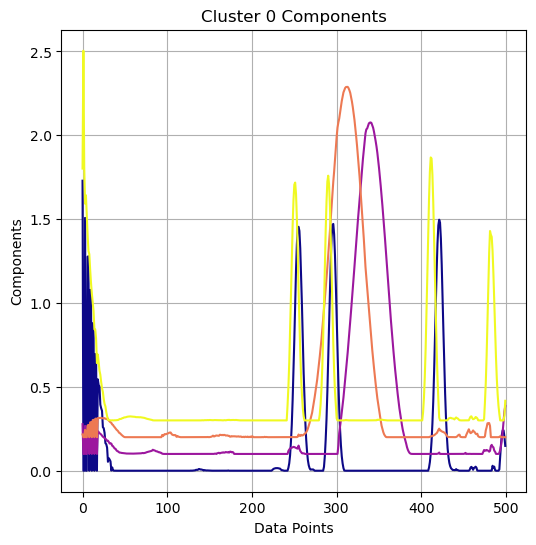

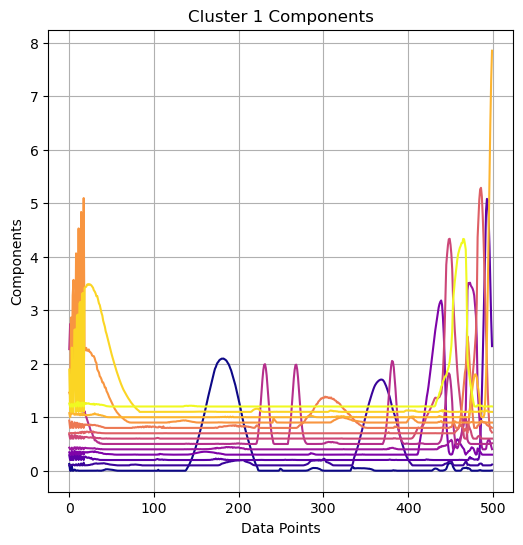

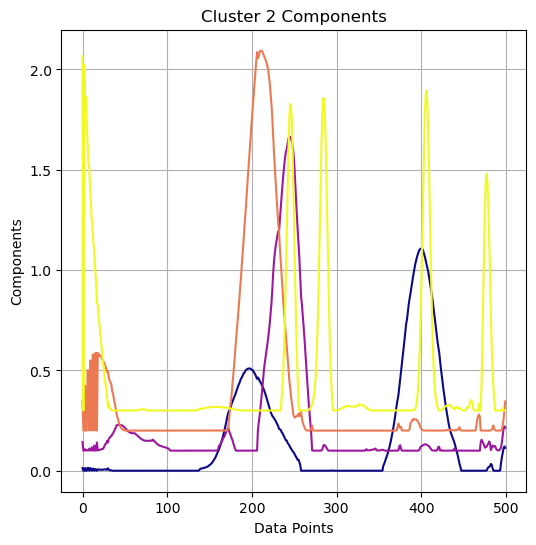

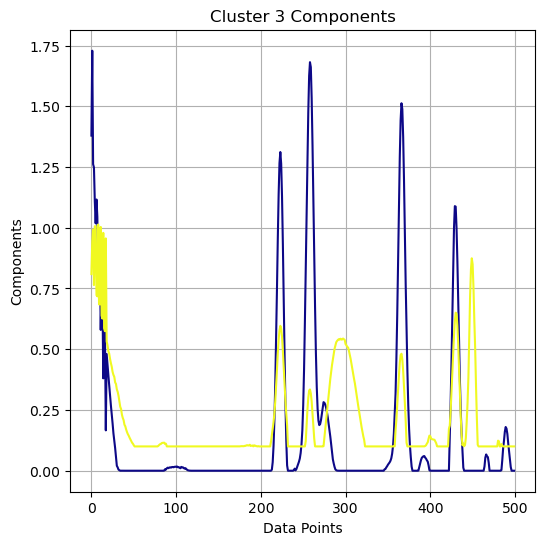

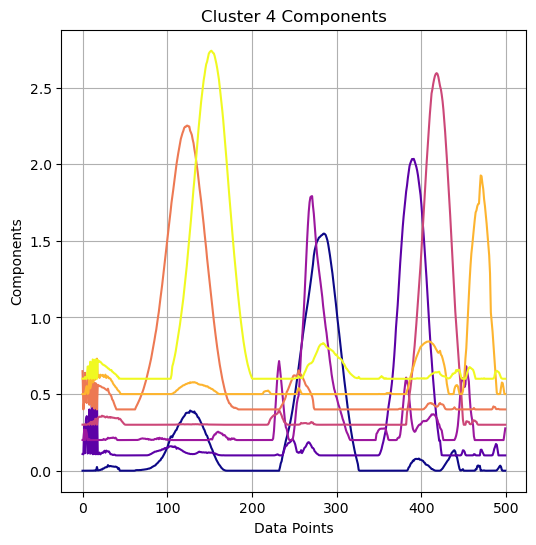

In [8]:
weights_cluster =  iso.run_sklearn_nmf_and_agg_cluster(combined_rot_data, max_components = 30, max_iter = 1000, n_clusters = 5, cluster_matrix = 'H')

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 1000
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvd, solver: mu, tol: 1e-06
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has 

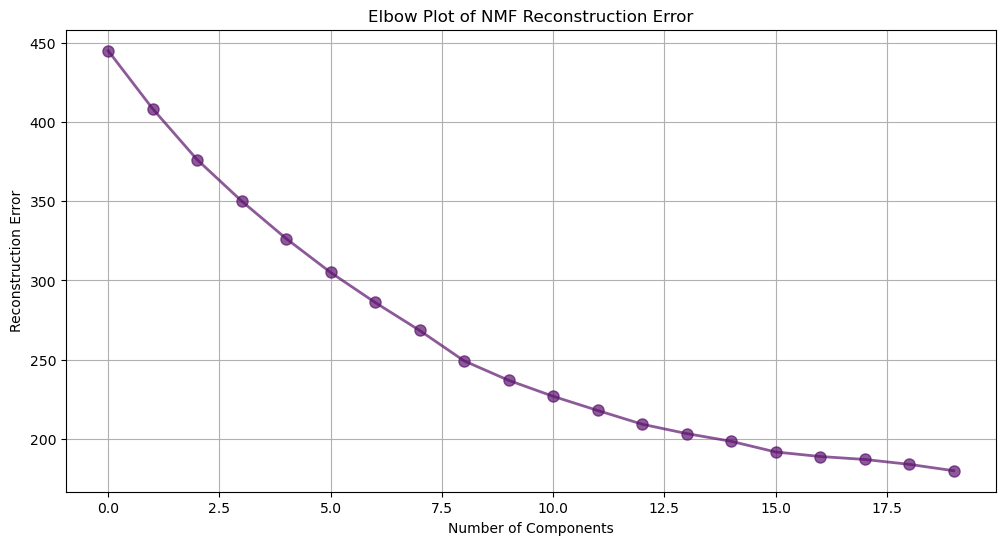

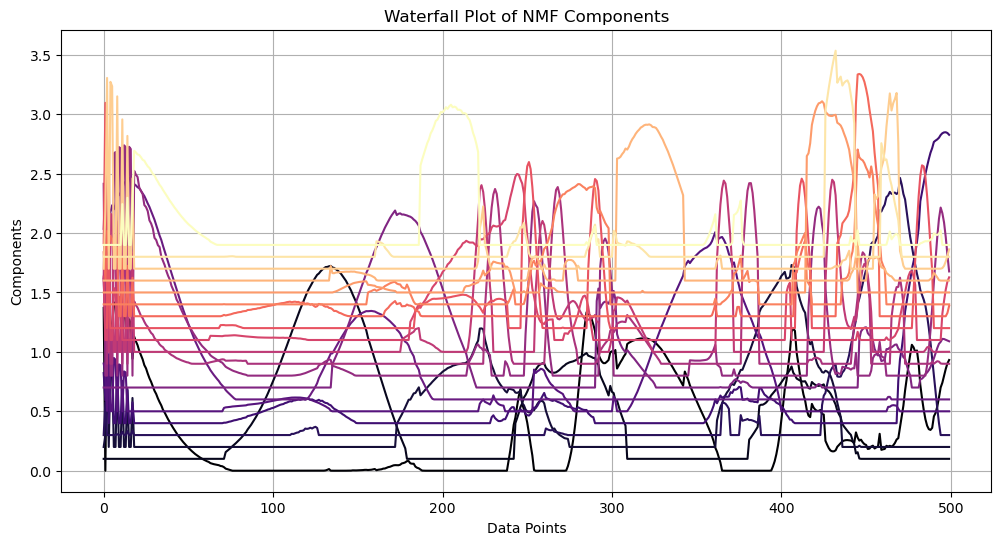

The best number of components is 20


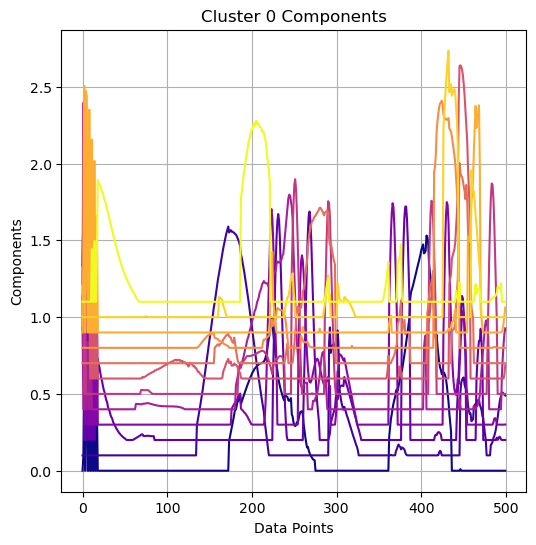

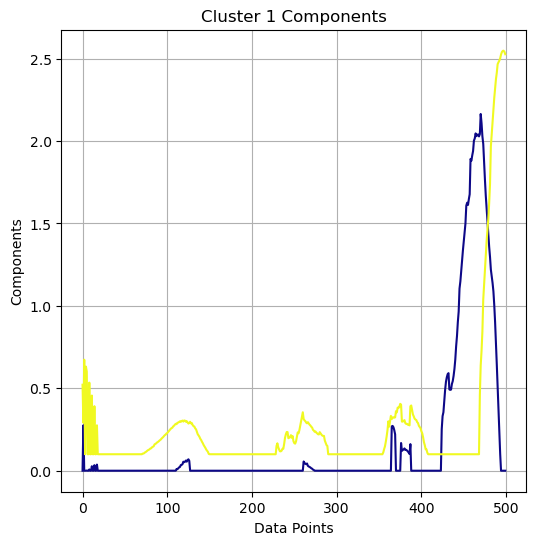

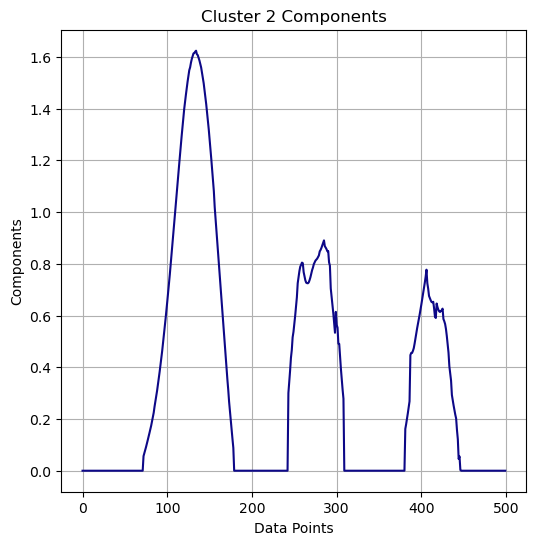

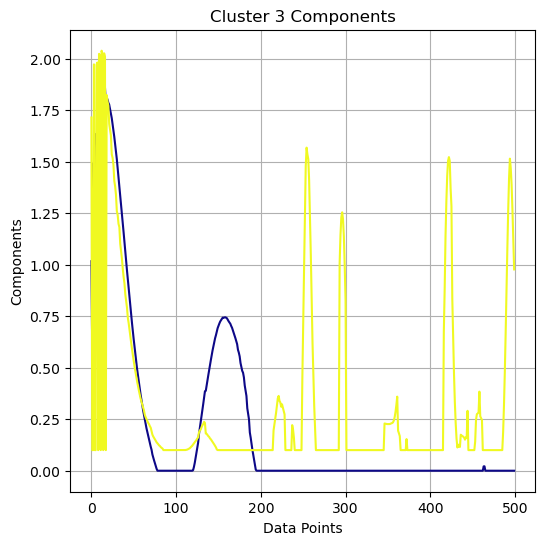

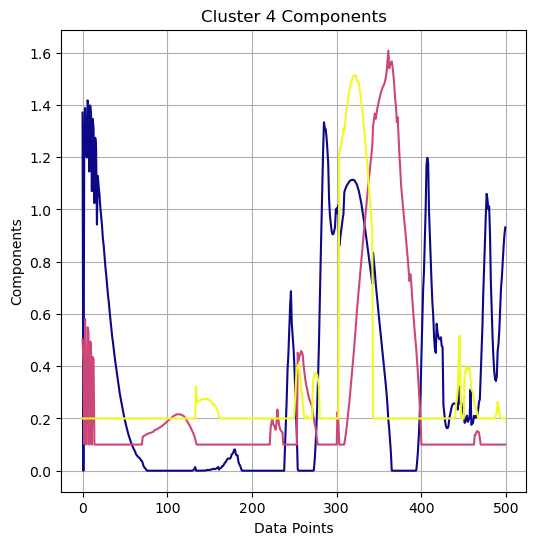

In [9]:
best_W, best_H, best_reconstruction_err, data_dict =  iso.run_sklearn_nmf_and_agg_cluster(combined_rot_data, max_components = 20, max_iter = 1000, n_clusters = 5, cluster_matrix = 'W')

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 1000
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvd, solver: cd, tol: 1e-05
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has 

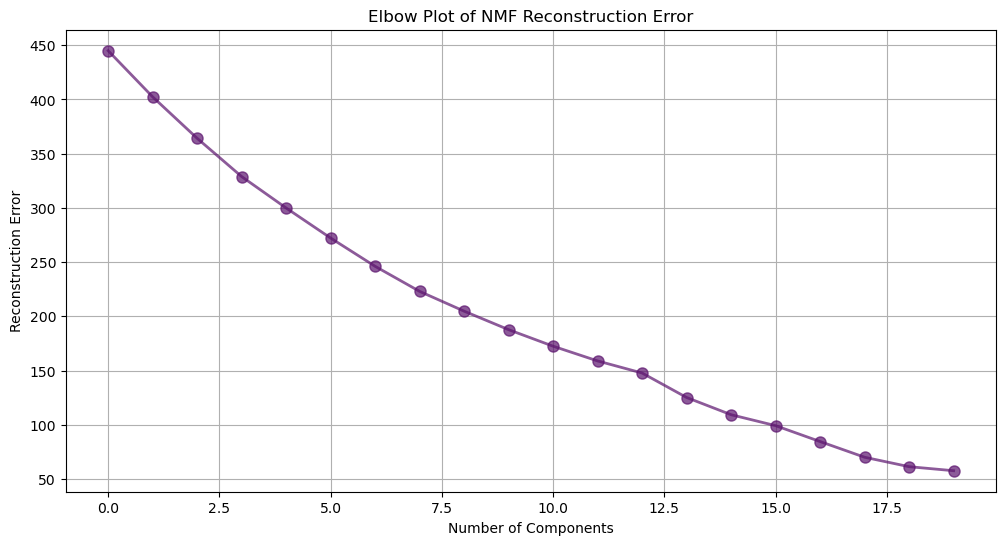

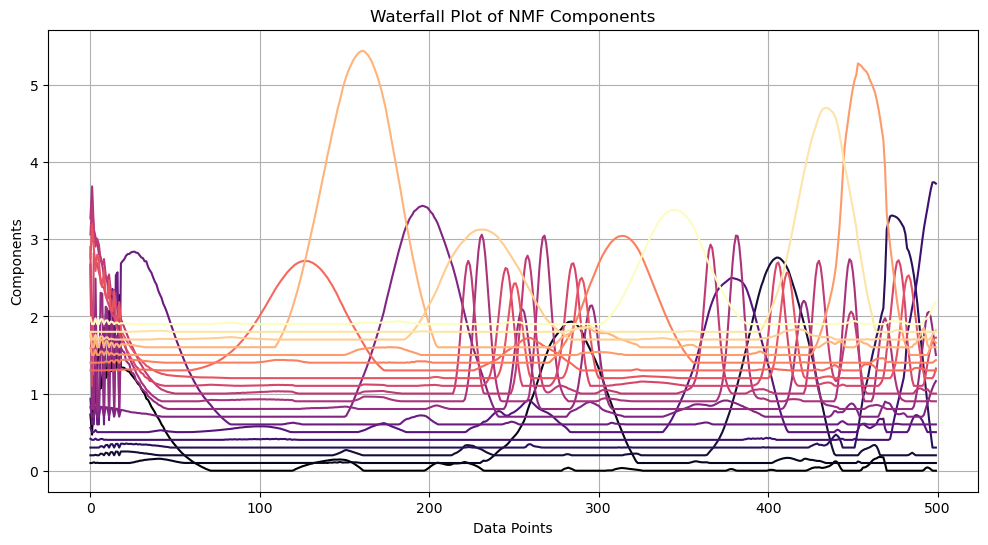

The best number of components is 20


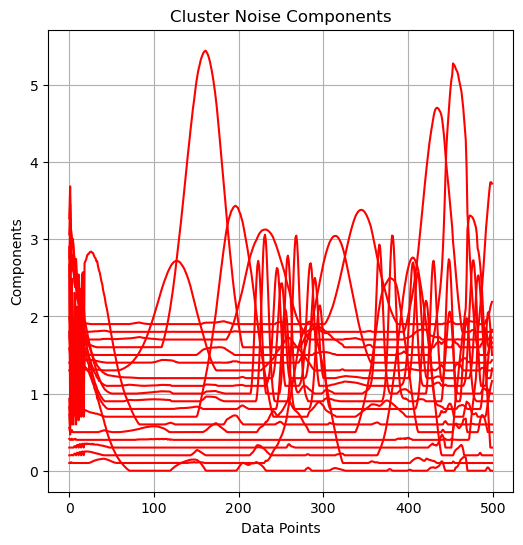

In [10]:
best_W, best_H, best_reconstruction_err, data_dict =  iso.run_sklearn_nmf_and_dbscan(combined_rot_data, max_components = 20, max_iter = 1000, cluster_matrix = 'W')

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 1000
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: random, solver: cd, tol: 1e-05
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has 

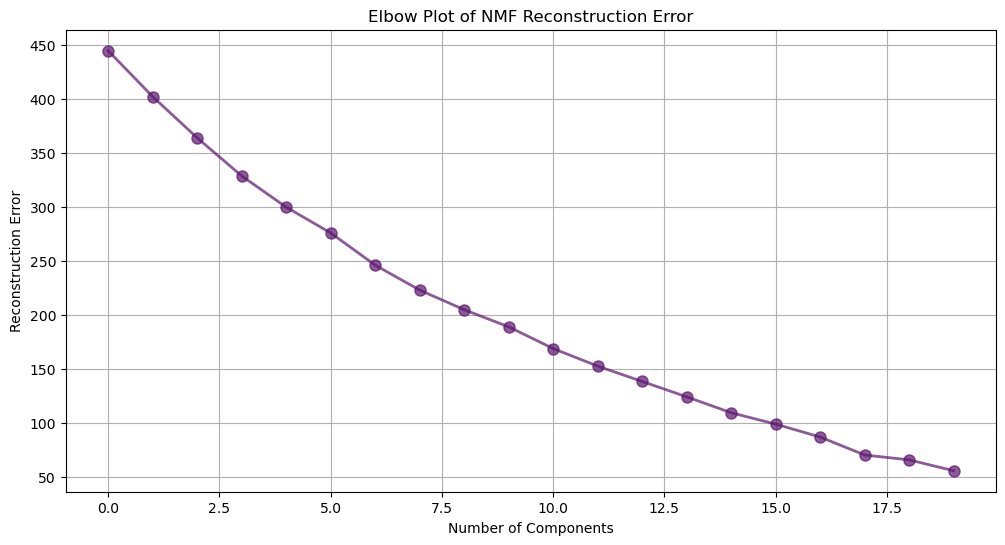

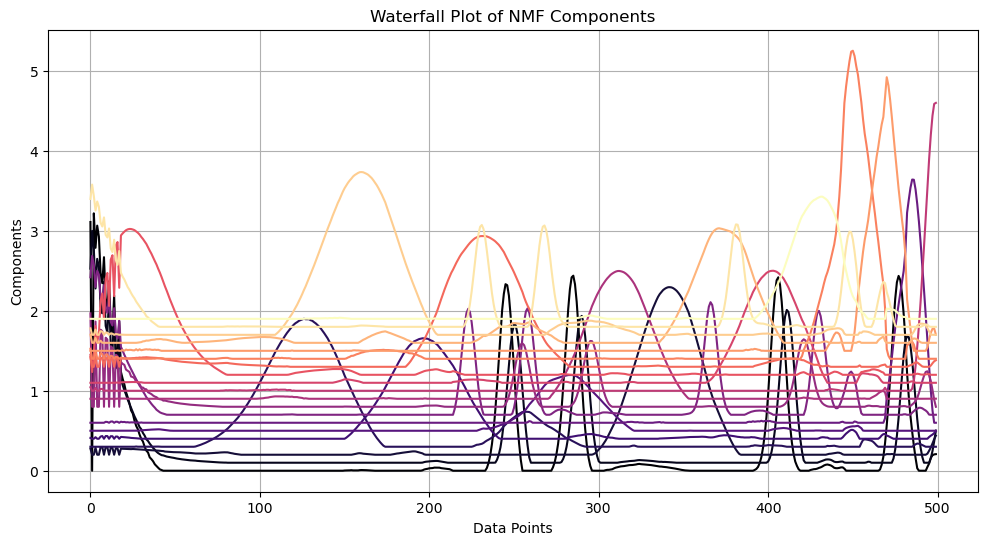

The best number of components is 20


TypeError: cluster_results_weights() takes 3 positional arguments but 4 were given

In [11]:
best_W, best_H, best_reconstruction_err, data_dict =  iso.run_sklearn_nmf_and_hdbscan(combined_rot_data, max_components = 20, max_iter = 1000, cluster_matrix = 'H')